# Approaches to cluster analysis

## Generating the data

Before moving any further, let us generate some data such that we can try different clustering algorithms. We want to generate 600 data points in a two-dimensional space gathered into three fairly separated clusters. Feel free to jump to the next cell.

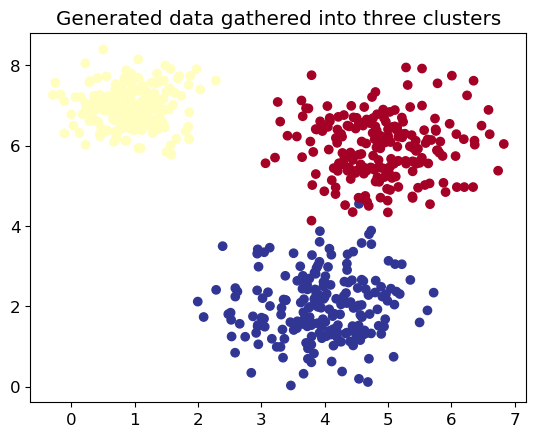

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.rcParams['font.size'] = 12

# Define cluster centers and standard deviations
centers = [[4, 2], [1, 7], [5, 6]]
cluster_std = [0.8, 0.5, 0.7]

# Generate synthetic data
X, labels = make_blobs(n_samples=600, centers=centers, cluster_std=cluster_std, random_state=23)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.RdYlBu_r)
plt.title('Generated data gathered into three clusters')
plt.show()


## Centroid-based clustering

In centroid-based clustering, each cluster is represented by a central vector, which is not necessarily a member of the data set. When the number of clusters is fixed to k, the k-means clustering gives a formal definition as an optimization problem: find the k cluster centers and assign the objects to the nearest cluster center, such that the squared distances from the cluster are minimized.

<div class="alert alert-info">K-means clustering</div>

KeyboardInterrupt: 

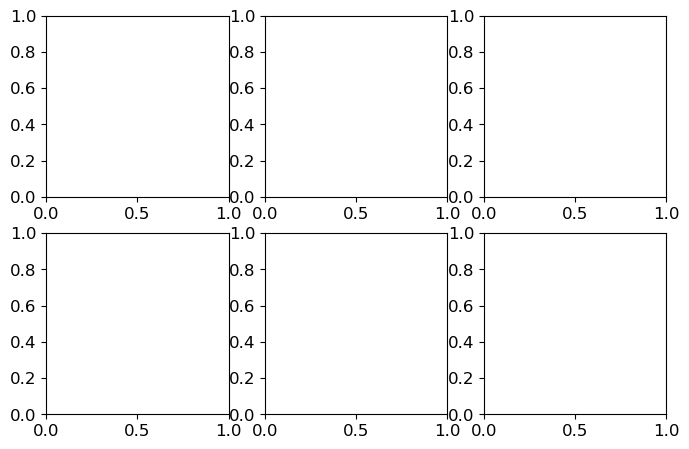

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Set up the loop and plot
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.reshape(-1)
k_values = range(2, 11)

for k, ax in zip(k_values, axes):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.RdYlBu_r)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', marker='s', s=20)
    
    silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
    ax.set_title(f'k = {k}, Silhouette = {silhouette:.2f}')
    ax.axis('off')

fig.tight_layout()
plt.show()


<div class="alert alert-warning">Exercise 1:Based on Silhouette score what is the optimal number of clusters?</div>

<div class="alert alert-info">Fuzzy C-means.</div>

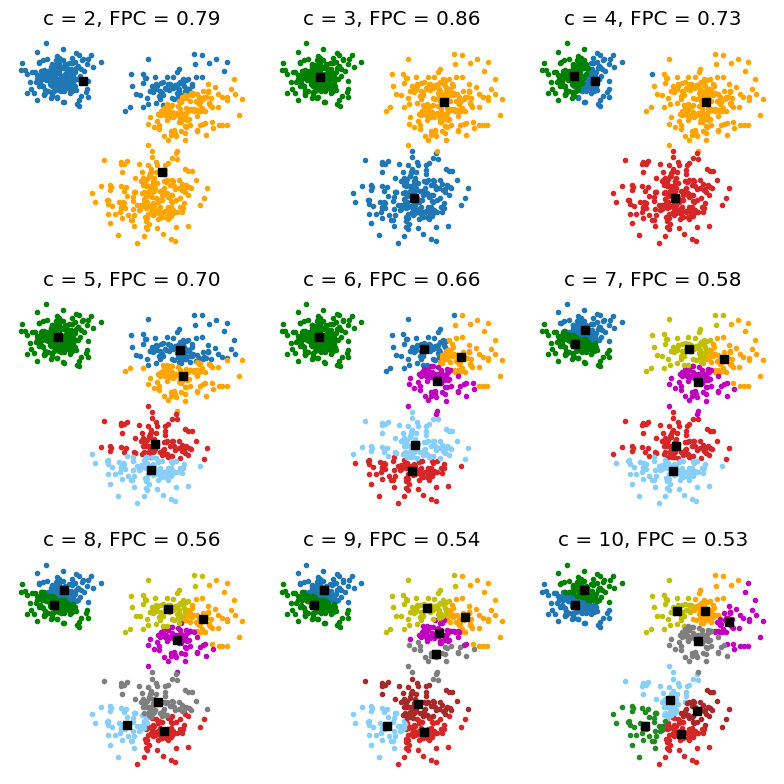

In [11]:
import skfuzzy as fuzz
colors = ['tab:blue', 'orange', 'g', 'tab:red', 'lightskyblue', 'm', 'y', 'tab:grey', 'Brown', 'ForestGreen']

# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
xpts=X[:, 0]
ypts=X[:, 1]
alldata = np.vstack((xpts, ypts))
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, m=2, error=0.005, maxiter=1000, seed=0, init=None)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'ks')

    ax.set_title('c = {0}, FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

## Hierarchical clustering

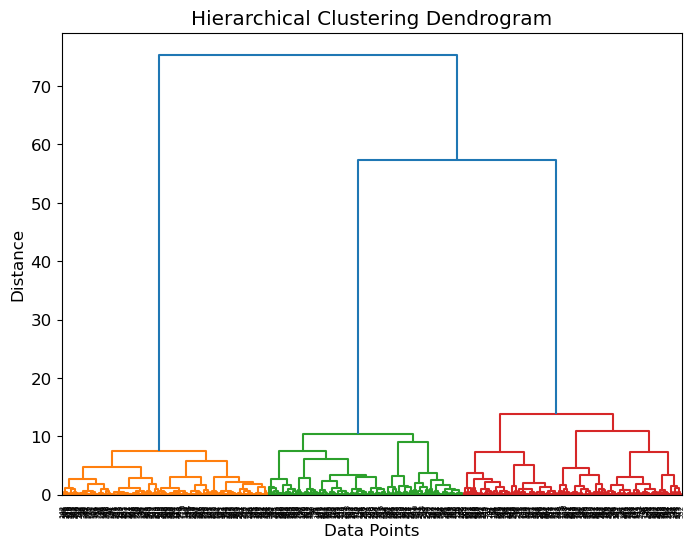

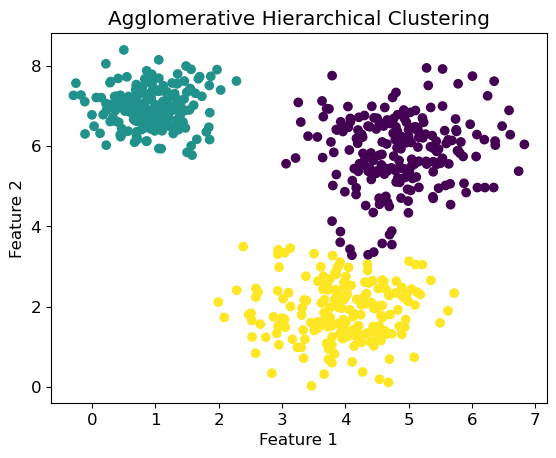

Cluster Assignments: [2 0 1 2 2]
[[3.66636304 0.32220291]
 [4.14252113 5.43835719]
 [1.26823034 6.91318592]
 [4.03116547 2.31194369]
 [4.02361956 1.25579179]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
np.random.seed(42)

# Calculate the pairwise distances between data points
distances = pdist(X)

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='ward')  # You can also try other linkage methods

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Perform agglomerative clustering
n_clusters = 3  # Specify the number of clusters you want
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X)

# Plot the clustered data points
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Display cluster assignments for the first five observations
print("Cluster Assignments:", agg_labels[:5])
print(X[:5,:])

## Spectral clustering

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

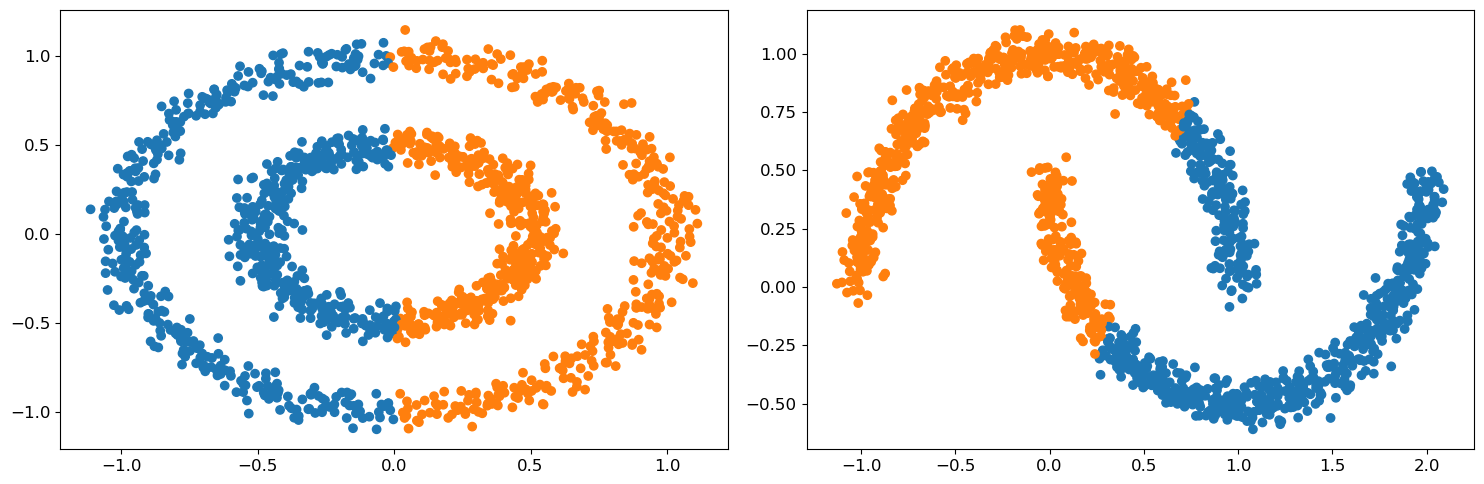

In [13]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

plt.rcParams['font.size'] = '12'

# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(15, 5)
    kmeans = KMeans(n_clusters=2).fit(X[0])
    
    temp = ['tab:blue' if x!=0 else 'tab:orange' for x in kmeans.labels_]
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=temp)

plt.tight_layout()

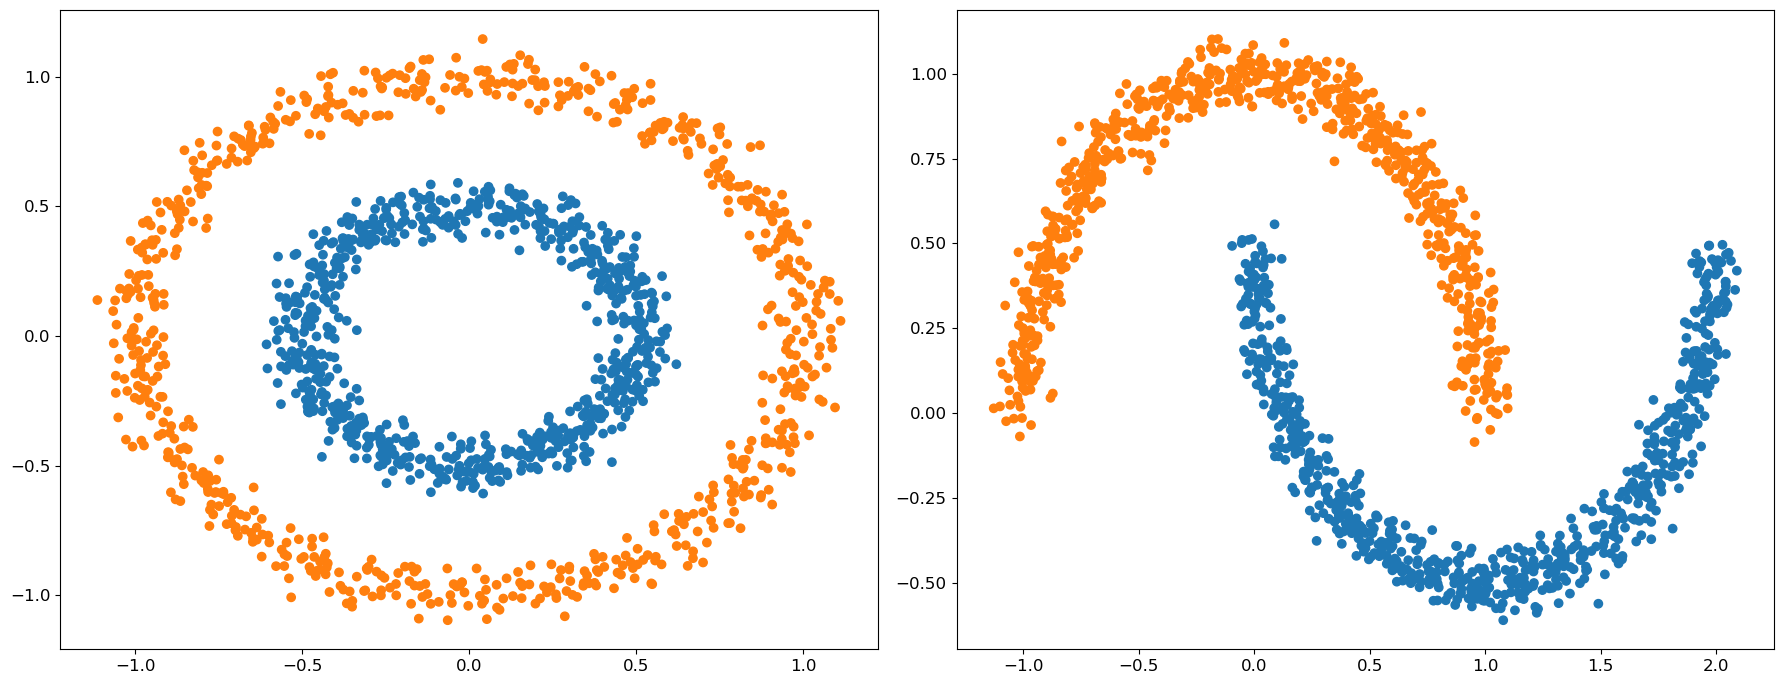

In [14]:
from sklearn.cluster import SpectralClustering

import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit(X[0])
    temp = ['tab:blue' if x!=0 else 'tab:orange' for x in spectral.labels_]
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=temp)
plt.tight_layout()

<div class="alert alert-warning">Exercise 2:As a data scientist you decide to apply an appropriate clustering approach on your dataset for customer segmentation into three clusters. Once you display the data, three moon-like groups can be visualized, which of the following lines can be applied for clustering?</div>

<div class="alert alert-success">Practice with Mall_Customers</div>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

# Extract 'Annual Income (k$)' and 'Spending Score (1-100)' for plotting
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<div class="alert alert-warning">Exercise 3:If you want to group the customer and have a representative for each group, which of the following codes would help you?</div>

In [20]:
#a)
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X)

In [17]:
#b)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [22]:
range_n_clusters = list(range(2, 11)) # Cluster numbers from 2 to 10
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    #print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.show()

TypeError: 'list' object is not callable

<div class="alert alert-warning">Exercise 4:Based on the plot, what is the optimal number of cluster?why?</div>

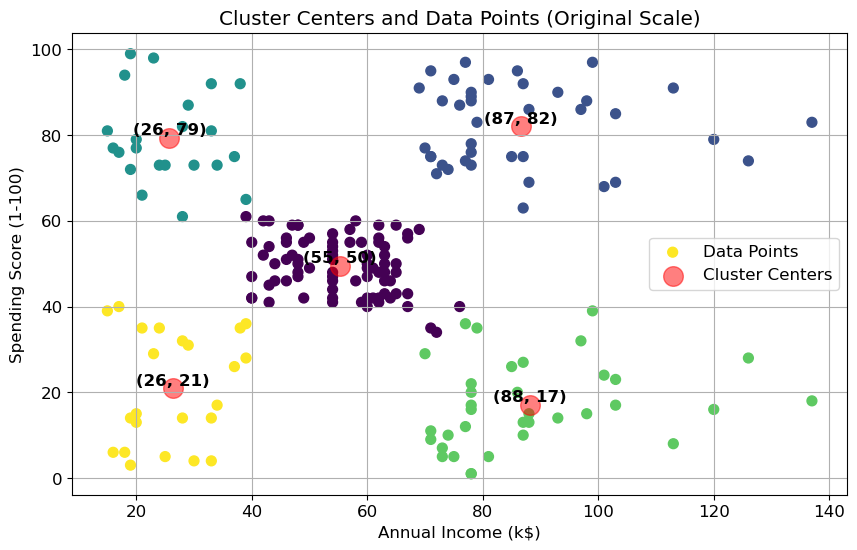

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Convert cluster centers back to the original scale
centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

import matplotlib.pyplot as plt

# Predict cluster labels for original scaled data
y_kmeans = kmeans.predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')

# Plotting the cluster centers on the original scale
plt.scatter(centers_original_scale[:, 0], centers_original_scale[:, 1], c='red', s=200, alpha=0.5, marker='o', label='Cluster Centers')

# Annotating the cluster centers with their original scale values
for i, center in enumerate(centers_original_scale):
    plt.text(center[0], center[1], f'({center[0]:.0f}, {center[1]:.0f})', 
             ha='center', va='bottom', color='black', fontweight='bold')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Centers and Data Points (Original Scale)')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-warning">Exercise 5:list the characteristics of K-means?</div>